### 项目简介

   计算机视觉研究领域对漫画的识别和生成越来越感兴趣。漫画识别的研究目的是研究计算机是否能从特定的照片中识别出漫画。近年来，这方面的研究越来越多，其主要原因之一是可以帮助理解人类如何识别脸，并且缩小人类感知和机器识别脸之间的差距。另一个主要原因则是有了更好的漫画识别机制，可以在保留内在身份的同时合成更好的漫画。过去的研究表明，对人类对照片人脸和漫画人脸的感知的研究可能有助于理解人类大脑是如何表征和编码面孔的。
  
本项目由我与 掩饰的贪吃蛇 （https://aistudio.baidu.com/aistudio/personalcenter/thirdview/855899） 共同完成。
    



### 项目要求
   通过部分人物的漫画数据和照片数据，对漫画与照片之间的对映射关系进行建模，通过机器学习等相关技术，建立准确的漫画-照片人脸识别模型，判断漫画和照片身份之间的对应关系。

   算法需要计算找出与Probe中的图片人物身份相同的Gallery图片，返回该图片的名称作为Probe图片的匹配结果。

### 项目准备

face.evoLVe 是一个非常全面的人脸识别库，它收集并实现了广泛的基于深度学习的人脸识别方法。由涵盖人脸识别实践的全部管道的必要组件组成，包括用于人脸检测、对齐、特征提取和匹配的交替骨干和损失函数。它收集并实现了广泛的基于深度学习的人脸识别方法。由涵盖人脸识别实践的全部管道的必要组件组成，包括用于人脸检测、对齐、特征提取和匹配的交替骨干和损失函数。

最重要的是，face.evoLVe项目里面包含基于PaddlePaddle框架复现的训练代码， 同时提供了 PaddleSlim 模型量化方案、 Paddle-Inference 服务端GPU部署方案、 PaddleLite 边缘端部署方案。 所以我们决定采用此开源项目来进行漫画与照片匹配项目的尝试。

reference： 
1. https://github.com/ZhaoJ9014/face.evoLVe
2. https://aistudio.baidu.com/aistudio/projectdetail/2305787?channelType=0&channel=0

In [1]:
# 克隆
# 基于paddle 的源码位于 paddle 文件夹下
#%cd ~/ 
#!git clone https://github.com/ZhaoJ9014/face.evoLVe.git

In [1]:

# 安装PaddleSlim2.1.0
!pip install paddleslim==2.1.0
!pip install scikit-image


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.9/300.9 kB 7.1 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 3.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


### 数据预处理

1. 原始数据集可从https://cs.nju.edu.cn/rl/WebCaricature.htm 申请下载。数据集共包括属于252个人物的6042幅漫画和5974张照片。 OriginalImages 子目录文件夹对应人物（以人物姓名命名），人物姓名文件夹下存放该人物对应的图片，其中P开头表示照片，C开头表示漫画。
2. 数据集还提供EvaluationProtocol，里面提供了训练和测试需要的list file。 详细文件说明请参见 readme

3. 原始数据是整张图，face.evoLVe 中 face_alin.py 使用 训练好的 MTCNN 模型来检测人脸并且将人脸crop出来。 
4. 因为本数据集提供facial points， 所以我直接从facial points文件里读出与MTCNN 输出对应的5个点送入face.evoLVe 自带的crop 函数， 可得到 align 好的漫画跟照片。 （详细代码参见 align/WCface_align.py )


In [2]:
# 解压数据集
! unzip -q /home/aistudio/data/data153458/archive.zip -d /home/aistudio/data/data153458/

In [3]:
%cd ~/face.evoLVe/paddle/align/
!python WCface_align.py -source_root='/home/aistudio/data/data153458/WebCaricature/OriginalImages' -points_root='/home/aistudio/data/data153458/WebCaricature/FacialPoints' -dest_root='/home/aistudio/face.evoLVe/paddle/data_aligned'

/home/aistudio/face.evoLVe/paddle/align
  0%|                                                   | 0/252 [00:00<?, ?it/s]/home/aistudio/face.evoLVe/paddle/align/matlab_cp2tform.py:84: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
100%|█████████████████████████████████████████| 252/252 [01:52<00:00,  1.97it/s]
Face alignment finished! 


### 训练

1. face.evoLVe 中 paddle/dataload.py 直接从文件夹里读图片。本数据集提供list 文件，所以在dataload.py 添加 WCNormalDataset class 来支持本数据集的读入。
2. 我们目前训练了一个模型

\WebCaricature\EvaluationProtocols\FaceIdentification\FR_Train_dev.txt


3. 训练的之前需要在config.py 里面修改 INPUT_LIST， DATA_ROOT, 以及想要修改的超参， 例如 BATCH_SIZE、 LR、NUM_EPOCH, 也可自己选择改框架提供的backbone， head， 跟 loss

我们目前使用的是它pre trained 好的 ppResNet_50
 

In [4]:
%cd ~/face.evoLVe/paddle/
# FR_Train_dev.txt
!python train.py

/home/aistudio/face.evoLVe/paddle
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
[10-29 20:22:19 MainThread @logger.py:242] Argv: train.py
[10-29 20:22:19 MainThread @utils.py:79] WRN paddlepaddle version: 

### 推理 及 评估

该框架提供了人脸识别模型推理的code （PaddleInference-demo/main.py/FaceEval). 它先把gallery 里面的图片先放入MTCNN识别人脸然后放入训练好的model提取feature，并存入face_db。probe 的 每一张人脸都会和face_db里面人脸的feature 通过余弦相似来对比，找到最相似的人脸并返回。

我们基于FaceEval 新增了 WCFaceEval （PaddleInference-demo/main.py）：
1. 我们发现MTCNN在漫画人像中表现不好，也因为我们之前就已经把人脸crop出来了， 所以我们去掉了MTCNN。
2. 支持读list file
3. 增进evaluate 和 evaluate_imge 两个函数。前者可以通过读probe_list 和 gallery_list 来批量 预测并计算accuracy。后者只预测单张图片，并把probe 图片和 best macth plot出来用于debug
  
  
原始的evaluation protocol 中，gallery list里面每个人物只有一张图片，这样其实难度很大。 我们稍微放松了些要求，load gallery 的时候把改人物下的所有照片或漫画都 load 进来了。



In [35]:
%cd ~/face.evoLVe/paddle/PaddleInference-demo/

import warnings
warnings.filterwarnings("ignore")

from main import *


model_root = '../output_dev/Backbone_epoch11'

probe_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/C2P/FR_Probe_C2P_dev.txt'
gallery_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/C2P/FR_Gallery_C2P_dev.txt'

data_root = '../data_aligned'

test = WCFaceEval(data_root, model_root, probe_list, gallery_list)

--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [is_test_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [conv_bn_fuse_pass]
I1029 20:39:24.949183   163 fuse_pass_base.cc:57] ---  detected 53 subgraphs
--- Running IR pass [conv_eltwiseadd_bn_fuse_pass]
--- Running IR pass [embedding_eltwise_layernorm_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v2]
--- Running IR pass [gpu_cpu_squeeze2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_reshape2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_flatten2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_mul_pass]
I1029 20:39:24.992879   163 fuse_pass_base.cc:57] ---  detected 1 subgraphs
--- Running IR pass [gpu_cpu_map_matmul_v2_to_matmul_pass]
  0%|                                                   | 0/126 [00:00<?, ?it/s]

/home/aistudio/face.evoLVe/paddle/PaddleInference-demo
face_data_path not exist!,try to get faceDatabase transform!


pass [matmul_scale_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v3]
--- Running IR pass [gpu_cpu_map_matmul_to_mul_pass]
--- Running IR pass [fc_fuse_pass]
I1029 20:39:25.022858   163 fuse_pass_base.cc:57] ---  detected 1 subgraphs
--- Running IR pass [fc_elementwise_layernorm_fuse_pass]
--- Running IR pass [conv_elementwise_add_act_fuse_pass]
--- Running IR pass [conv_elementwise_add2_act_fuse_pass]
--- Running IR pass [conv_elementwise_add_fuse_pass]
I1029 20:39:25.090018   163 fuse_pass_base.cc:57] ---  detected 16 subgraphs
--- Running IR pass [transpose_flatten_concat_fuse_pass]
--- Running IR pass [runtime_context_cache_pass]
--- Running analysis [ir_params_sync_among_devices_pass]
I1029 20:39:25.095960   163 ir_params_sync_among_devices_pass.cc:100] Sync params from CPU to GPU
--- Running analysis [adjust_cudnn_workspace_size_pass]
--- Running analysis [inference_op_replace_pass]
--- Running analysis [ir_graph_to_program_pass]
I1029 20:39:25.293980   163 analysis_p

finished faceDatabase transform!


In [39]:
test.evaluate()

100%|███████████████████████████████████████| 2930/2930 [02:24<00:00, 20.22it/s]

########  Evaluation Summary ########
* Evaluated 2930 probe images in total.
* 2930 probe images found matches in the gallery.
* Among all matched probe images, 1328 images got matched correctly. The accuracy is 0.453242.
* 0 images found no match in the gallery.


Acc 大约在 50% 左右. 我们觉得这个漫画还是很有挑战性的，有的漫画过于抽象，比如下面这张。 感觉模型给的匹配还有 有点相似的，虽然不是同一个人

Evaluating probe image: ../data_aligned/Zooey Deschanel/C00022.jpg ...


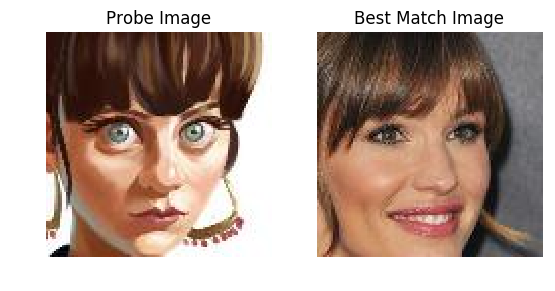

Best Match is Jennifer Garner+P00040 with the probability of 0.598111 


In [37]:
test.evaluate_image('../data_aligned/Zooey Deschanel/C00022.jpg')

Evaluating probe image: ../data_aligned/John Travolta/C00001.jpg ...


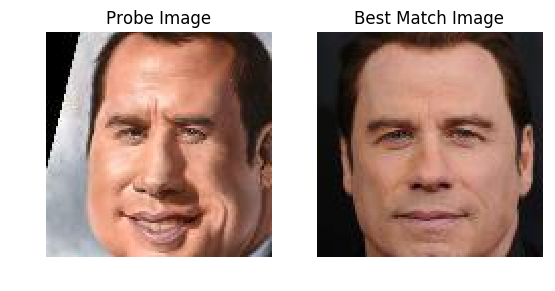

Best Match is John Travolta+P00020 with the probability of 0.751050 


In [38]:
test.evaluate_image('../data_aligned/John Travolta/C00001.jpg')

In [20]:
# 尝试P2C
# 注意： 每一次 model_root/gallery_list 换了都需要先把 PaddleInference-demo/ galley_face.fdb 删掉，否则gallery db不会更新！！！
!rm gallery_data.fdb

probe_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/P2C/FR_Probe_P2C_dev.txt'
gallery_list = '/home/aistudio/data/data153458/WebCaricature/EvaluationProtocols/FaceIdentification/P2C/FR_Gallery_P2C_dev.txt'

data_root = '../data_aligned'

test = WCFaceEval(data_root, model_root, probe_list, gallery_list)


--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [is_test_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [conv_bn_fuse_pass]
I1029 20:32:40.661908   163 fuse_pass_base.cc:57] ---  detected 53 subgraphs
--- Running IR pass [conv_eltwiseadd_bn_fuse_pass]
--- Running IR pass [embedding_eltwise_layernorm_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v2]
--- Running IR pass [gpu_cpu_squeeze2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_reshape2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_flatten2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_mul_pass]
I1029 20:32:40.706087   163 fuse_pass_base.cc:57] ---  detected 1 subgraphs
--- Running IR pass [gpu_cpu_map_matmul_v2_to_matmul_pass]
--- Running IR pass [matmul_scale_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v3]
--- Running IR pass [gpu_cpu_map_matmul_to_mul_pass]

face_data_path not exist!,try to get faceDatabase transform!


100%|█████████████████████████████████████████| 126/126 [00:41<00:00,  2.64it/s]

finished faceDatabase transform!


In [21]:
test.evaluate()

100%|███████████████████████████████████████| 2958/2958 [02:26<00:00, 20.26it/s]

########  Evaluation Summary ########
* Evaluated 2958 probe images in total.
* 2958 probe images found matches in the gallery.
* Among all matched probe images, 1433 images got matched correctly. The accuracy is 0.484449.
* 0 images found no match in the gallery.


ACC 也在 50 % 左右

Evaluating probe image: ../data_aligned/Yan Mo/P00007.jpg ...


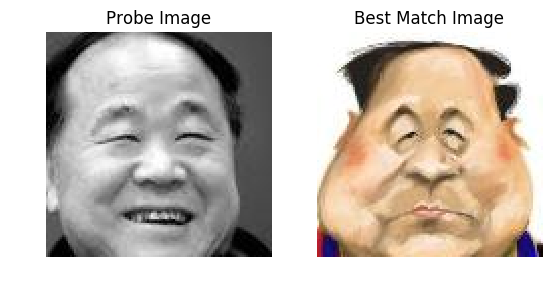

Best Match is Yan Mo+C00002 with the probability of 0.675082 


In [26]:
test.evaluate_image('../data_aligned/Yan Mo/P00007.jpg')

Evaluating probe image: ../data_aligned/Woody Allen/P00014.jpg ...


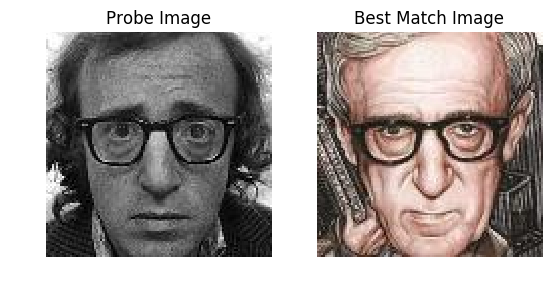

Best Match is Woody Allen+C00070 with the probability of 0.701942 


In [30]:
test.evaluate_image('../data_aligned/Woody Allen/P00014.jpg')

Evaluating probe image: ../data_aligned/Yimou Zhang/P00009.jpg ...


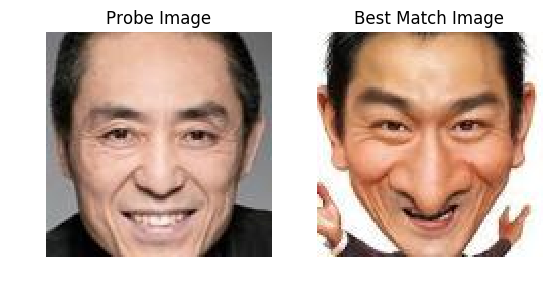

Best Match is Dehua Liu+C00007 with the probability of 0.665800 


In [32]:
test.evaluate_image('../data_aligned/Yimou Zhang/P00009.jpg')

### 总结


最后的acc还有待提高，我们认为可以从以下几个方面入手：

* 超参的选择与优化，防止过拟合
* 模型的设计
* 人脸相似度计算其他方法的探索，例如度量学习


这次项目是我们两个人第一次完成的完整的深度学习项目，我们感觉在对模型，dl运作机制的理解是还有很多不足，以后还需要多多学习。